# Explore GISAID data


In [1]:
import os
import math
import pickle
import numpy as np
import torch
from pprint import pprint
from collections import Counter, defaultdict
from pyrocov import mutrans, pangolin, geo
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams["axes.edgecolor"] = "gray"
matplotlib.rcParams["figure.facecolor"] = "white"

In [2]:
with open("results/columns.pkl", "rb") as f:
    columns = pickle.load(f)
print("loaded {} rows".format(len(columns["day"])))
print(list(columns.keys()))

loaded 6466300 rows
['clade', 'index', 'day', 'location', 'lineage']


## Phylogenetic distribution of samples

In [3]:
%%time
clade_counts = {"full": Counter(columns["clade"])}
for max_num_clades in [2000, 5000, 10000]:
    with open(f"results/columns.{max_num_clades}.pkl", "rb") as f:
        counts = Counter(pickle.load(f)["clade"])
        clade_counts[max_num_clades] = counts
        print((max_num_clades, len(counts)))

(2000, 2000)
(5000, 4999)
(10000, 9995)
CPU times: user 7.18 s, sys: 2.45 s, total: 9.63 s
Wall time: 9.88 s


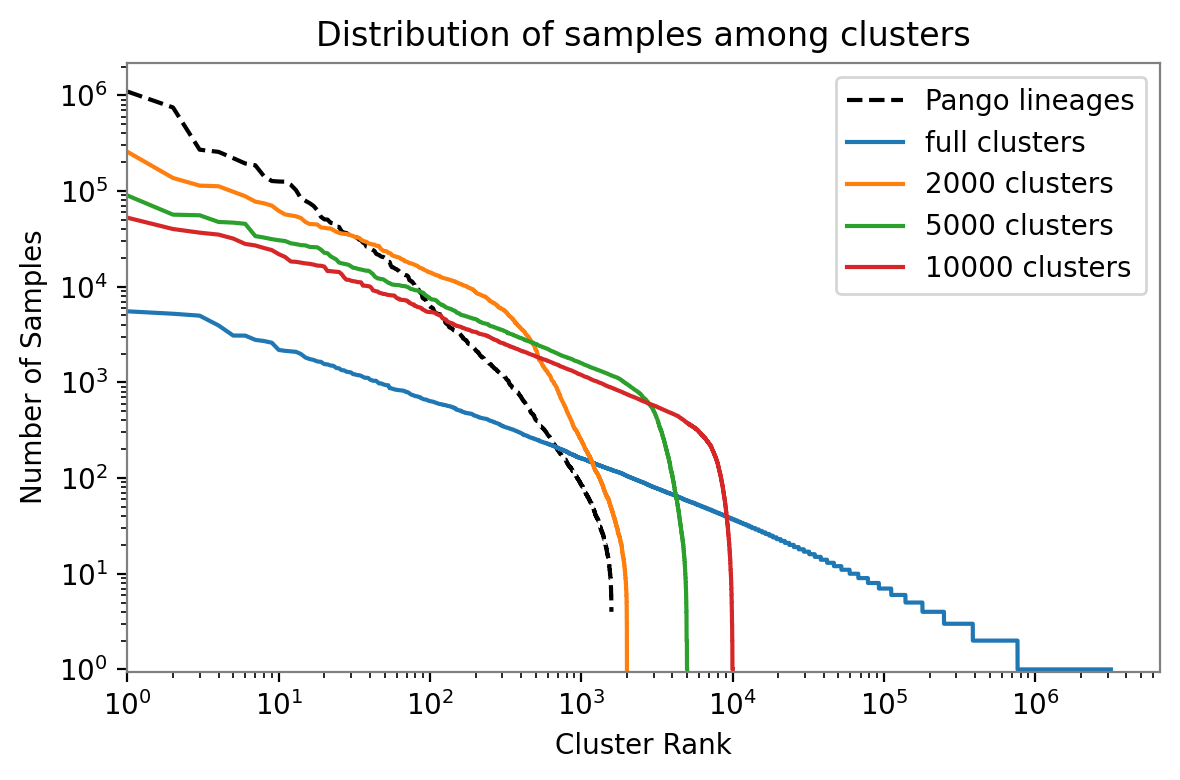

In [4]:
strain_counts = Counter(columns["lineage"])
plt.figure(figsize=(6,4))
Y = [c for _, c in strain_counts.most_common()]
plt.plot(torch.arange(1,1 + len(Y)), Y, "k--", label="Pango lineages")
for k, v in clade_counts.items():
    Y = [c for _, c in v.most_common()]
    plt.plot(torch.arange(1,1 + len(Y)), Y, label=f"{k} clusters")
plt.yscale("log")
plt.xscale("log")
plt.xlim(1, None)
plt.ylim(0.95, None)
plt.xlabel("Cluster Rank")
plt.ylabel("Number of Samples")
plt.legend(loc="upper right")
plt.title("Distribution of samples among clusters")
plt.tight_layout()
plt.savefig("paper/clade_distribution.png")

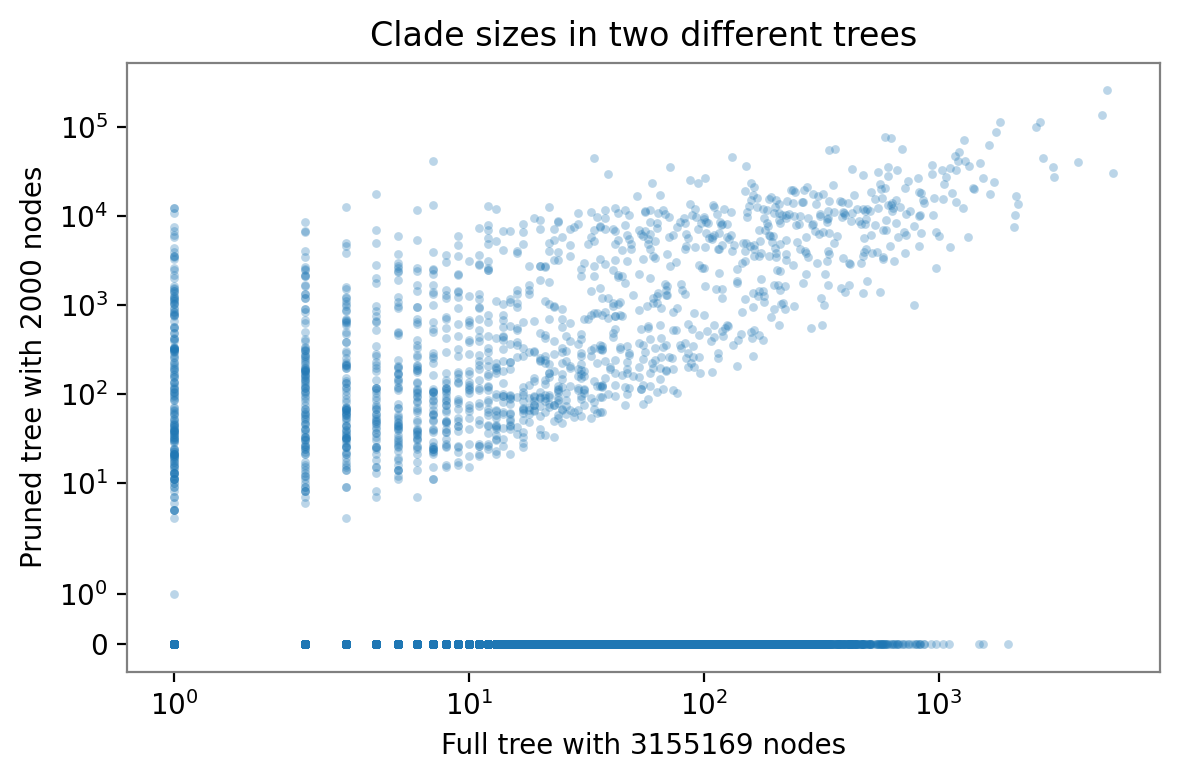

In [5]:
keys = sorted(clade_counts["full"])
X = [clade_counts["full"][k] for k in keys]
Y = [clade_counts[2000][k] for k in keys]
plt.scatter(X, Y, 10, alpha=0.3, lw=0)
plt.xscale("symlog")
plt.yscale("symlog")
plt.xlabel(f"Full tree with {len(clade_counts['full'])} nodes")
plt.ylabel("Pruned tree with 2000 nodes")
plt.title("Clade sizes in two different trees")
plt.tight_layout()

## Geographic distribution of samples

In [6]:
%%time
pprint(sorted(Counter(map(geo.gisaid_normalize, columns["location"])).items()))

[('Africa / Algeria / Adrar', 1),
 ('Africa / Algeria / Alger', 3),
 ('Africa / Algeria / Algiers', 14),
 ('Africa / Algeria / Batna', 1),
 ('Africa / Algeria / Bejaia', 2),
 ('Africa / Algeria / Biskra', 1),
 ('Africa / Algeria / Blida', 7),
 ('Africa / Algeria / Bordj Bou Arreridj', 1),
 ('Africa / Algeria / Boufarik', 2),
 ('Africa / Algeria / Bouira', 9),
 ('Africa / Algeria / Djelfa', 1),
 ('Africa / Algeria / Eddis', 1),
 ('Africa / Algeria / El Oued', 2),
 ('Africa / Algeria / Laghouat', 7),
 ('Africa / Algeria / Medea', 2),
 ('Africa / Algeria / Oran', 1),
 ('Africa / Algeria / Ouargla', 4),
 ('Africa / Algeria / Setif', 1),
 ('Africa / Algeria / Sidi Bel Abbes', 4),
 ('Africa / Algeria / Tindouf', 1),
 ('Africa / Algeria / Tipaza', 1),
 ('Africa / Algeria / Tizi Ouzou', 1),
 ('Africa / Algeria / Touggourt', 1),
 ('Africa / Angola', 1),
 ('Africa / Angola / Bengo', 2),
 ('Africa / Angola / Bie', 6),
 ('Africa / Angola / C Cubango', 4),
 ('Africa / Angola / Cabinda', 39),
 ('Afr

 ('Asia / Sri Lanka / Divulapitiya', 10),
 ('Asia / Sri Lanka / Dondangaslanda', 1),
 ('Asia / Sri Lanka / Eastern', 24),
 ('Asia / Sri Lanka / Elpitiya', 1),
 ('Asia / Sri Lanka / Galagedara', 1),
 ('Asia / Sri Lanka / Galle', 31),
 ('Asia / Sri Lanka / Gampaha', 168),
 ('Asia / Sri Lanka / Hambantota', 4),
 ('Asia / Sri Lanka / Hatton', 1),
 ('Asia / Sri Lanka / Homagama', 17),
 ('Asia / Sri Lanka / Horana', 2),
 ('Asia / Sri Lanka / Ingiriya', 1),
 ('Asia / Sri Lanka / Ja Ela', 22),
 ('Asia / Sri Lanka / Jaffna', 63),
 ('Asia / Sri Lanka / Kadawatha', 14),
 ('Asia / Sri Lanka / Kaduwela', 19),
 ('Asia / Sri Lanka / Kahathuduwa', 4),
 ('Asia / Sri Lanka / Kaleniya', 1),
 ('Asia / Sri Lanka / Kalubowila', 2),
 ('Asia / Sri Lanka / Kalutara', 47),
 ('Asia / Sri Lanka / Kandy', 20),
 ('Asia / Sri Lanka / Karainagar', 1),
 ('Asia / Sri Lanka / Karapitiya', 23),
 ('Asia / Sri Lanka / Katunayake', 3),
 ('Asia / Sri Lanka / Kayts', 1),
 ('Asia / Sri Lanka / Kegalle', 12),
 ('Asia / Sri Lank

 ('Europe / Belgium / Awans', 1),
 ('Europe / Belgium / Baal', 53),
 ('Europe / Belgium / Baardegem', 1),
 ('Europe / Belgium / Baarle Hertog', 10),
 ('Europe / Belgium / Bagneux', 1),
 ('Europe / Belgium / Bailleul', 3),
 ('Europe / Belgium / Balen', 91),
 ('Europe / Belgium / Bangkok', 1),
 ('Europe / Belgium / Barbencon', 1),
 ('Europe / Belgium / Barchon', 2),
 ('Europe / Belgium / Barry', 1),
 ('Europe / Belgium / Basecles', 1),
 ('Europe / Belgium / Bassenge', 4),
 ('Europe / Belgium / Bassevelde', 3),
 ('Europe / Belgium / Bassilly', 2),
 ('Europe / Belgium / Bastogne', 3),
 ('Europe / Belgium / Batsheers', 4),
 ('Europe / Belgium / Battignies', 4),
 ('Europe / Belgium / Baudour', 1),
 ('Europe / Belgium / Bauffe', 1),
 ('Europe / Belgium / Baulers', 2),
 ('Europe / Belgium / Bavegem', 1),
 ('Europe / Belgium / Bavikhove', 11),
 ('Europe / Belgium / Bazel', 17),
 ('Europe / Belgium / Beaufays', 1),
 ('Europe / Belgium / Beaumont', 3),
 ('Europe / Belgium / Beauraing', 3),
 ('Eur

 ('Europe / Belgium / Thirimont', 1),
 ('Europe / Belgium / Thoricourt', 1),
 ('Europe / Belgium / Thuillies', 1),
 ('Europe / Belgium / Thuin', 3),
 ('Europe / Belgium / Thulin', 1),
 ('Europe / Belgium / Thy Le Chateau', 1),
 ('Europe / Belgium / Tiegem', 5),
 ('Europe / Belgium / Tielen', 2),
 ('Europe / Belgium / Tielt', 301),
 ('Europe / Belgium / Tielt Winge', 74),
 ('Europe / Belgium / Tienen', 162),
 ('Europe / Belgium / Tildonk', 2),
 ('Europe / Belgium / Tinlot', 1),
 ('Europe / Belgium / Tongeren', 29),
 ('Europe / Belgium / Torhout', 230),
 ('Europe / Belgium / Tourinnes La Grosse', 1),
 ('Europe / Belgium / Tournai', 30),
 ('Europe / Belgium / Tourpes', 1),
 ('Europe / Belgium / Trazegnies', 2),
 ('Europe / Belgium / Tremelo', 79),
 ('Europe / Belgium / Trivières', 2),
 ('Europe / Belgium / Trois Ponts', 1),
 ('Europe / Belgium / Trooz', 4),
 ('Europe / Belgium / Tubeke', 1),
 ('Europe / Belgium / Tubize', 34),
 ('Europe / Belgium / Turnhout', 186),
 ('Europe / Belgium / U

 ('Europe / Slovakia / Besenov', 1),
 ('Europe / Slovakia / Bezovce', 1),
 ('Europe / Slovakia / Bijacovce', 1),
 ('Europe / Slovakia / Biskupova', 1),
 ('Europe / Slovakia / Blatne', 1),
 ('Europe / Slovakia / Bnska Bystrica', 1),
 ('Europe / Slovakia / Bobot', 1),
 ('Europe / Slovakia / Bobrov', 4),
 ('Europe / Slovakia / Bobrovec', 1),
 ('Europe / Slovakia / Bohdanovce Nad Trnavou', 1),
 ('Europe / Slovakia / Bojnice', 3),
 ('Europe / Slovakia / Bojnicky', 2),
 ('Europe / Slovakia / Boleraz', 1),
 ('Europe / Slovakia / Bolesov', 2),
 ('Europe / Slovakia / Boliarov', 1),
 ('Europe / Slovakia / Borcova', 1),
 ('Europe / Slovakia / Borovce', 1),
 ('Europe / Slovakia / Borsky Mikulas', 7),
 ('Europe / Slovakia / Bosany', 1),
 ('Europe / Slovakia / Branc', 1),
 ('Europe / Slovakia / Bratialava', 1),
 ('Europe / Slovakia / Bratisava', 1),
 ('Europe / Slovakia / Bratislava', 3110),
 ('Europe / Slovakia / Bratislava Regon', 1),
 ('Europe / Slovakia / Bratislava Reigon', 10),
 ('Europe / Slo

 ('North America / El Salvador / La Paz', 13),
 ('North America / El Salvador / Morazan', 3),
 ('North America / El Salvador / San Miguel', 1),
 ('North America / El Salvador / San Salvador', 43),
 ('North America / El Salvador / Santa Ana', 7),
 ('North America / El Salvador / Sonsonate', 3),
 ('North America / El Salvador / Usulutan', 15),
 ('North America / Grenada', 35),
 ('North America / Guadeloupe', 52),
 ('North America / Guadeloupe / Baie Mahault', 123),
 ('North America / Guadeloupe / Basse Terre', 33),
 ('North America / Guadeloupe / Fort De France', 17),
 ('North America / Guadeloupe / Lamentin', 2),
 ('North America / Guadeloupe / Le Gosier', 2),
 ('North America / Guadeloupe / Le Moule', 1),
 ('North America / Guadeloupe / Les Abymes', 198),
 ('North America / Guadeloupe / Metropole', 3),
 ('North America / Guadeloupe / Morne A L Eau', 1),
 ('North America / Guadeloupe / Pointe A Pitre', 93),
 ('North America / Guadeloupe / Saint Francois', 2),
 ('North America / Guadelou

In [7]:
counts = Counter()
for location in columns["location"]:
    parts = location.split("/")
    if len(parts) < 2:
        continue
    parts = tuple(p.strip() for p in parts[:3])
    counts[parts] += 1
total_counts = [c for _, c in counts.most_common()]

In [8]:
countries = Counter()
regions = defaultdict(Counter)
for location in columns["location"]:
    location = geo.gisaid_normalize(location)
    parts = location.split(" / ")
    location = " / ".join(parts[:3])
    country = " / ".join(parts[:2])
    countries[country] += 1
    regions[country][location] += 1
print("Total Regions")
print("------------------------------------------------------")
for c, count in countries.most_common():
    rs = " ".join(str(v) for k, v in regions[c].most_common())
    print(f"{c}\n{count}\t{rs}")

Total Regions
------------------------------------------------------
North America / USA
2135915	351784 141691 124717 112802 111977 100839 92473 71639 61571 59760 55835 54225 50955 44234 43261 42328 41709 37791 35432 31398 31072 29833 26060 25587 25319 24180 22033 21008 19365 19364 16878 16055 14963 14669 14274 13846 12230 11908 11769 11346 10912 9719 8924 8921 8505 8433 7747 7741 6396 3697 3551 1400 820 483 233 212 31 5 1 1 1 1 1
Europe / United Kingdom
1467856	1177955 140853 136650 12377 9 8 3 1
Europe / Germany
338331	87704 55431 39175 28489 19632 16481 14441 12991 12258 11745 9126 7959 7826 4738 4646 3741 1948
Europe / Denmark
294302	134035 52274 45060 35568 24296 3069
North America / Canada
232303	85920 54503 32774 32579 16707 3923 2929 2200 708 41 19
Asia / Japan
178407	30704 15139 12496 12223 11364 10711 9030 7544 5443 4771 3399 3258 3060 2822 2805 2731 2631 2546 2358 2201 2076 1932 1917 1815 1797 1689 1557 1451 1397 1360 1325 1248 1136 1068 1016 918 885 773 659 649 606 591 570 

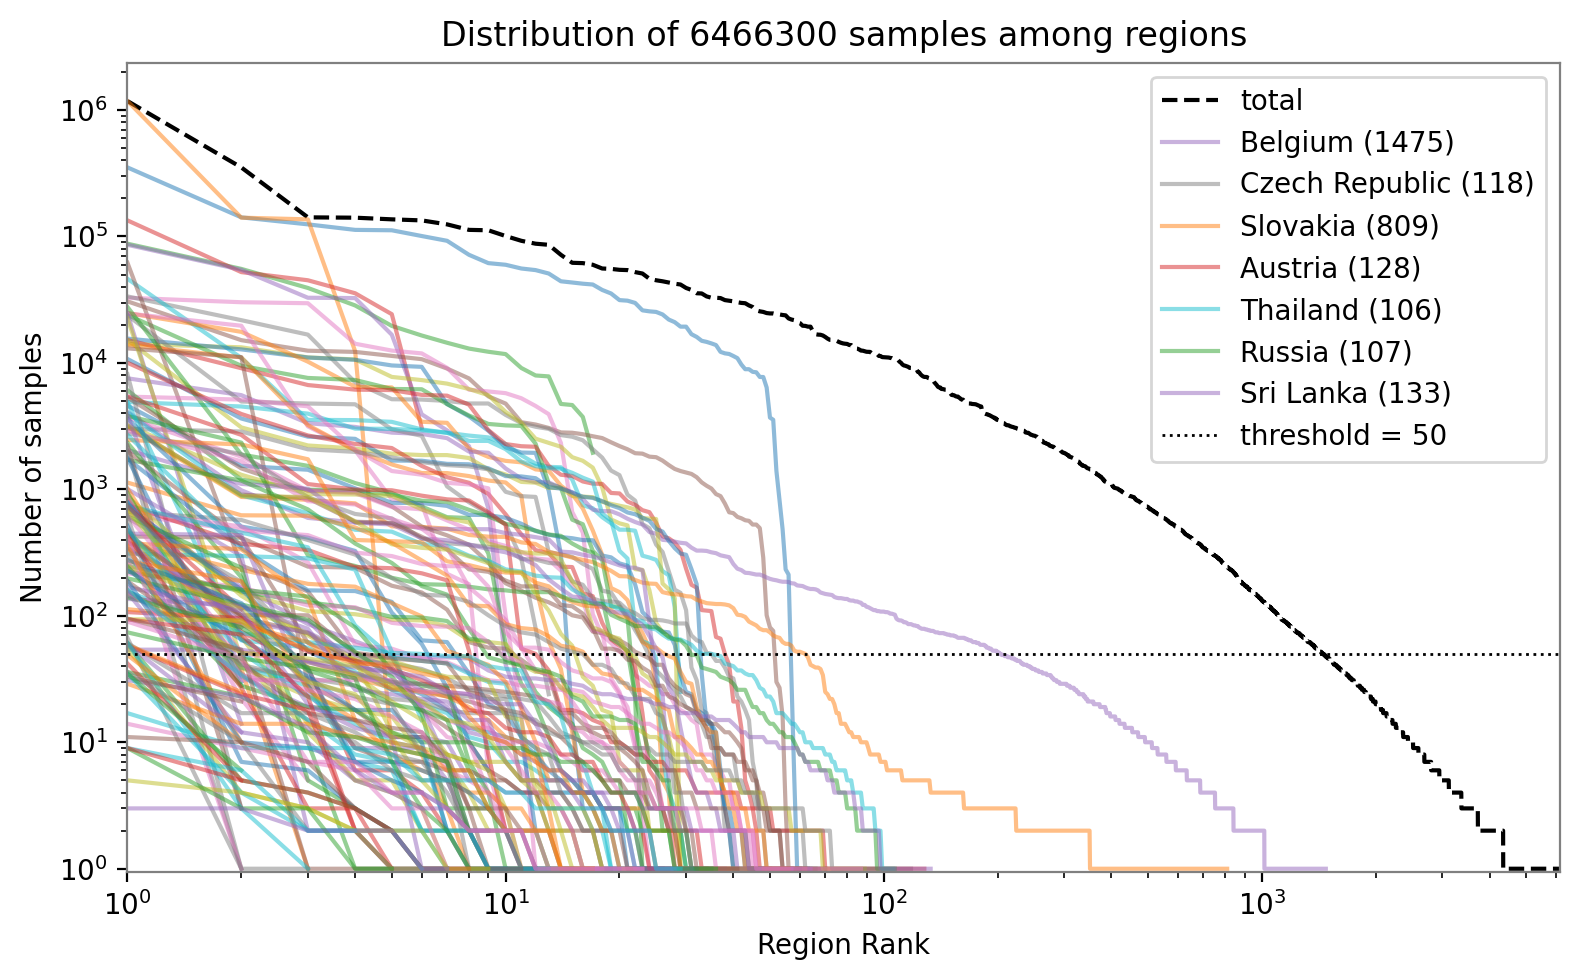

In [9]:
plt.figure(figsize=(8, 5))
Y = total_counts
X = torch.arange(1, 1 + len(Y))
plt.plot(X, Y, "k--", label="total")
for c, count in countries.most_common():
    Y = [v for k, v in regions[c].most_common()]
    X = torch.arange(1, 1 + len(Y))
    label = c.split(" / ")[-1] + f" ({len(Y)})"
    plt.plot(X, Y, alpha=0.5, label=label if len(Y) > 100 else None)
plt.axhline(50, color="k", linestyle=":", lw=1, label="threshold = 50")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 1 + len(total_counts))
plt.ylim(0.95, None)
plt.legend(loc="upper right")
plt.title(f"Distribution of {sum(total_counts)} samples among regions")
plt.xlabel("Region Rank")
plt.ylabel("Number of samples")
plt.tight_layout()
plt.savefig("paper/region_distribution.png")

In [22]:
cs = Counter()
for country, counts in regions.items():
    for region, count in counts.items():
        cs[region] = count
for r, v in cs.most_common(100):
    print(v, r)

1177955 Europe / United Kingdom / England
351784 North America / USA / California
141691 North America / USA / Texas
140853 Europe / United Kingdom / Scotland
136650 Europe / United Kingdom / Wales
134035 Europe / Denmark / Hovedstaden
124717 North America / USA / Colorado
112802 North America / USA / Florida
111977 North America / USA / New York
100839 North America / USA / Massachusetts
92473 North America / USA / Minnesota
87704 Europe / Germany / North Rhine Westphalia
85920 North America / Canada / British Columbia
71639 North America / USA / Washington
61954 Europe / Turkey
61571 North America / USA / Arizona
59760 North America / USA / Michigan
55835 North America / USA / Illinois
55431 Europe / Germany / Baden Wurttemberg
54503 North America / Canada / Ontario
54225 North America / USA / Utah
52274 Europe / Denmark / Midtjylland
50955 North America / USA / North Carolina
46297 South America / Brazil / Sao Paulo
45060 Europe / Denmark / Syddanmark
44234 North America / USA / Wis

In [10]:
strain_counts = Counter(columns["lineage"])
for strain, count in strain_counts.most_common(20):
    short = pangolin.compress(strain)
    long = pangolin.decompress(strain)
    assert strain == short, (strain, long)
    if short == long:
        print(f"{count: >10d} {short}")
    else:
        print(f"{count: >10d} {short} (aka {long})")

   1094523 B.1.1.7
    746617 AY.4 (aka B.1.617.2.4)
    270136 AY.103 (aka B.1.617.2.103)
    256381 AY.43 (aka B.1.617.2.43)
    220349 AY.44 (aka B.1.617.2.44)
    194008 AY.122 (aka B.1.617.2.122)
    185641 BA.1 (aka B.1.1.529.1)
    142181 AY.3 (aka B.1.617.2.3)
    127169 B.1.617.2
    125619 AY.25 (aka B.1.617.2.25)
    125157 B.1.2
    116194 AY.25.1 (aka B.1.617.2.25.1)
    102040 B.1
     83969 AY.100 (aka B.1.617.2.100)
     78999 AY.29 (aka B.1.617.2.29)
     74571 B.1.177
     69735 AY.4.2 (aka B.1.617.2.4.2)
     62791 P.1 (aka B.1.1.28.1)
     53710 B.1.1
     50559 AY.5 (aka B.1.617.2.5)


In [11]:
fine_countries = set()
for parts, count in counts.items():
    if count >= 5000:
        fine_countries.add(parts[1])
fine_countries = list(sorted(fine_countries))
print("\n".join(fine_countries))

Australia
Austria
Belgium
Brazil
Canada
Chile
Denmark
Finland
France
Germany
Greece
Iceland
India
Ireland
Israel
Italy
Japan
Latvia
Lithuania
Luxembourg
Mexico
Netherlands
Norway
Portugal
Singapore
Slovenia
South Africa
South Korea
Spain
Sweden
Switzerland
Turkey
USA
United Kingdom


In [12]:
locations = Counter(columns["location"])
print("\n".join(f"{c}\t{p}" for p, c in locations.most_common() if "United Kingdom" in p))

1177955	Europe / United Kingdom / England
140853	Europe / United Kingdom / Scotland
136650	Europe / United Kingdom / Wales
12377	Europe / United Kingdom / Northern Ireland
9	Europe / United Kingdom / Suffolk
8	Europe / United Kingdom / London
3	Europe / United Kingdom
1	Europe / United Kingdom / Birmingham


In [13]:
print("Europe:", sum(1 for l in columns["location"] if "Europe" in l))
print("World - Europe:", sum(1 for l in columns["location"] if "Europe" not in l))

Europe: 3346703
World - Europe: 3119597


## When were lineages born?

In [14]:
days = defaultdict(list)
for lineage, day in zip(columns["lineage"], columns["day"]):
    days[lineage].append(day)

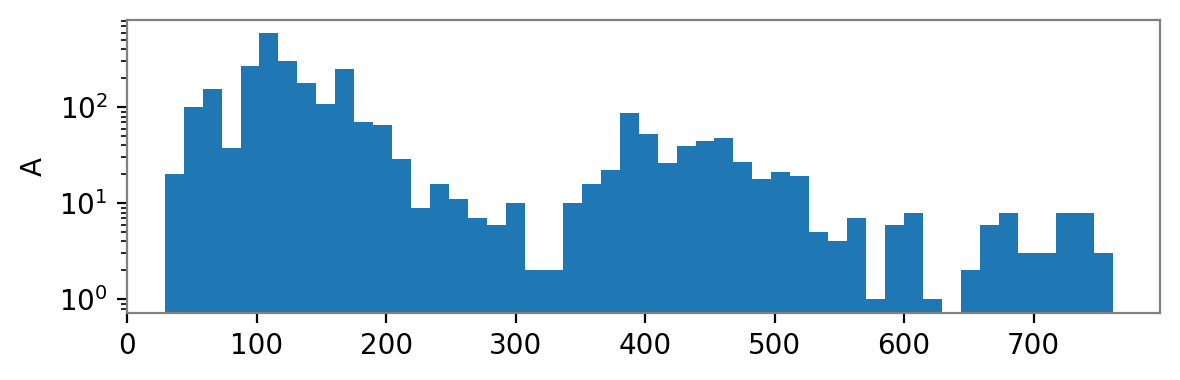

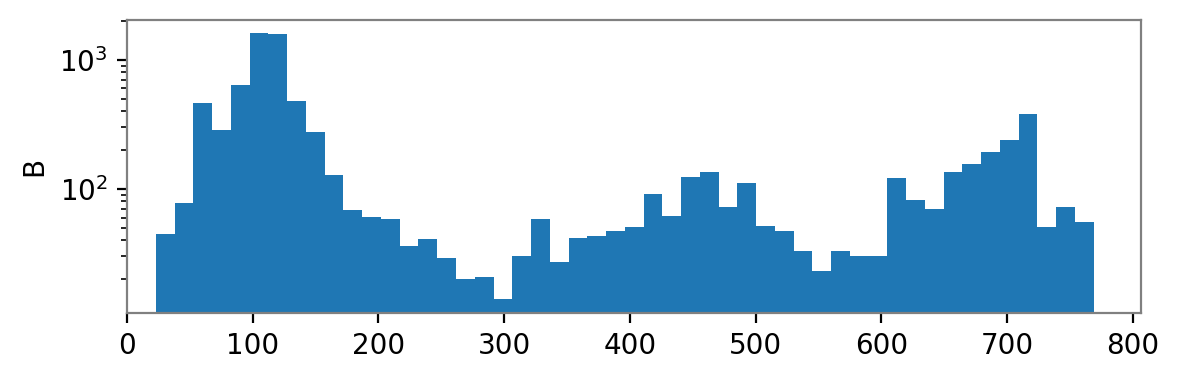

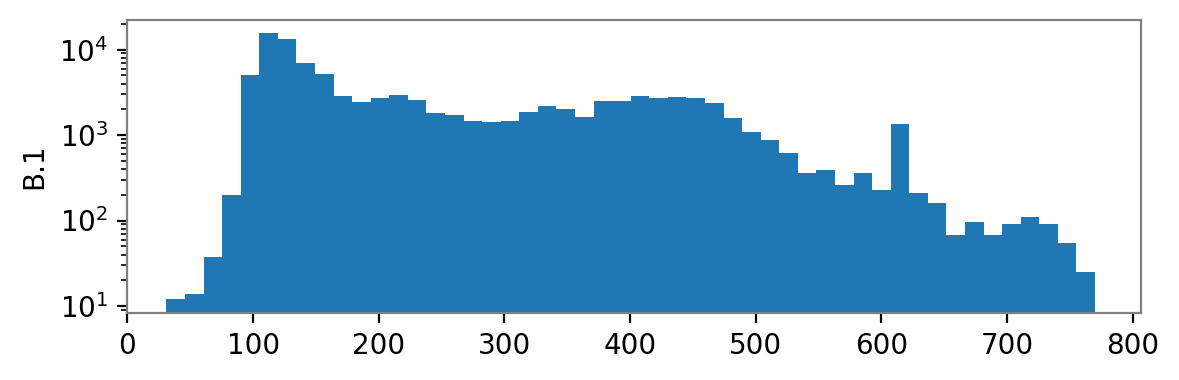

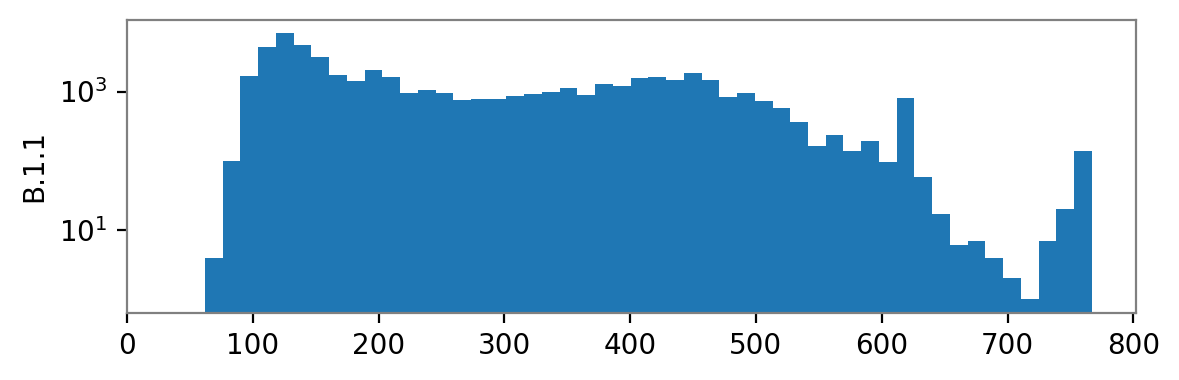

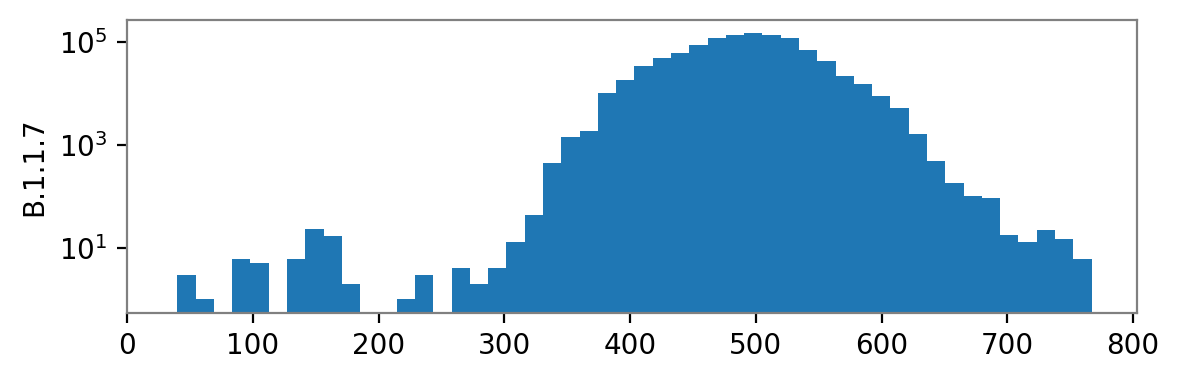

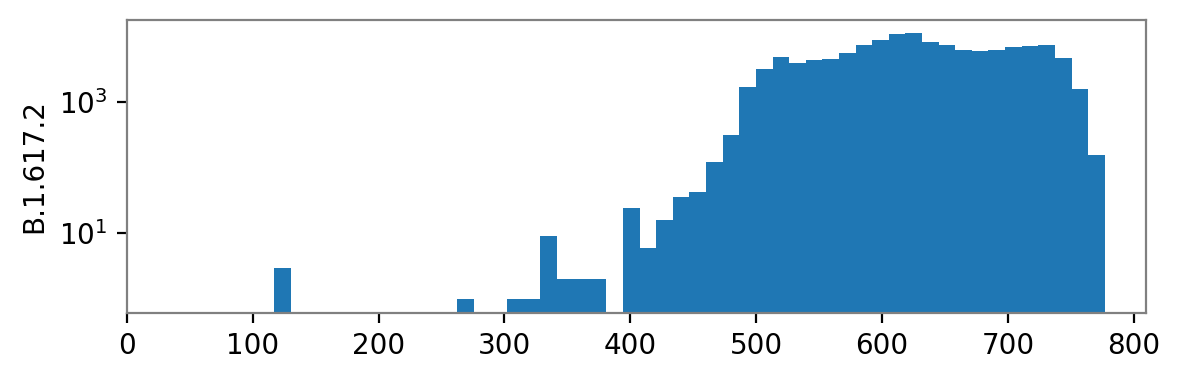

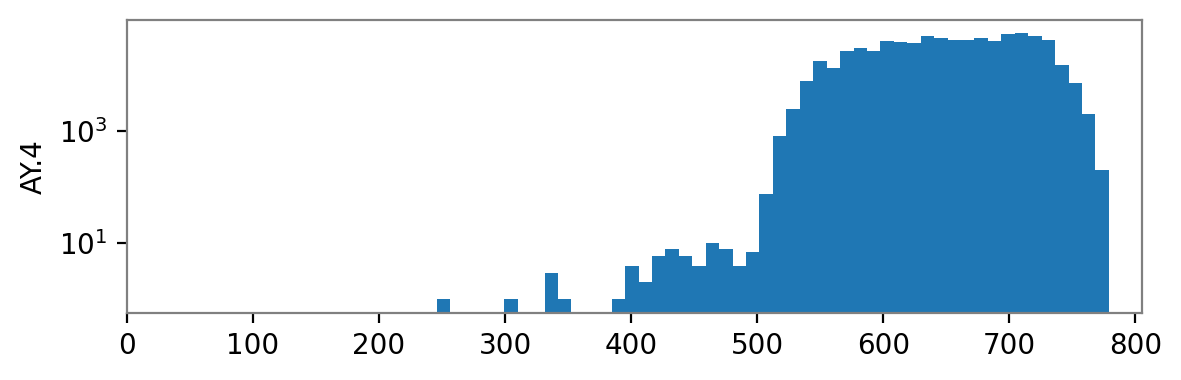

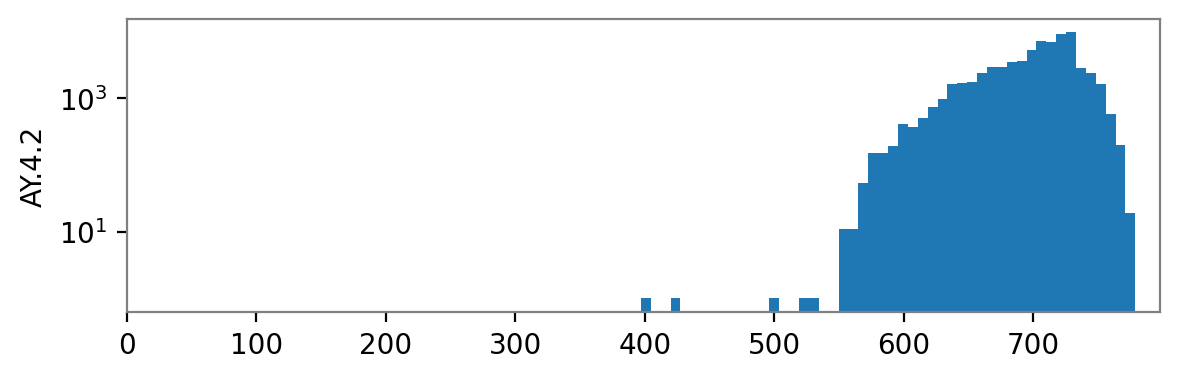

In [15]:
def plot_birth(lineage):
    plt.figure(figsize=(6,2))
    plt.hist(np.array(days[lineage]), bins=50)
    plt.yscale("log")
    plt.ylabel(lineage)
    plt.tight_layout()
    plt.xlim(0, None)
plot_birth("A")
plot_birth("B")
plot_birth("B.1")
plot_birth("B.1.1")
plot_birth("B.1.1.7")
plot_birth("B.1.617.2")
plot_birth("AY.4")
plot_birth("AY.4.2")

In [16]:
pdf = torch.zeros(max(days) + 1).scatter_add(0, torch.tensor(days), torch.ones(len(days)))
pdf /= pdf.sum()
cdf = pdf.cumsum(0)

TypeError: '>' not supported between instances of 'NoneType' and 'str'

In [ ]:
plt.plot(cdf)
plt.yscale("log")
plt.title("CDF of B.1.1.7 observations")

## Explore count data

In [ ]:
def load_data():
    filename = "results/mutrans.data.single.pt"
    if os.path.exists(filename):
        dataset = torch.load(filename)
    else:
        dataset = mutrans.load_gisaid_data()
        torch.save(dataset, filename)
    dataset.update(mutrans.load_jhu_data(dataset))
    return dataset

dataset = load_data()
locals().update(dataset)
for k, v in sorted(dataset.items()):
    if isinstance(v, torch.Tensor):
        print(f"{k} \t{type(v).__name__} of shape {tuple(v.shape)}")
    else:
        print(f"{k} \t{type(v).__name__} of size {len(v)}")

In [ ]:
daily_cases.shape

In [ ]:
probs = weekly_clades + 1 / weekly_clades.size(-1)
probs /= probs.sum(-1, True)
logits = probs.log()
logits -= logits.median(-1, True).values
plt.hist(logits.reshape(-1).numpy(), bins=100)
plt.yscale("symlog");

In [ ]:
logits -= logits.mean(-1, True)
plt.hist(logits.reshape(-1).numpy(), bins=100)
plt.yscale("symlog");

## How heterogeneous are lineages?

In [ ]:
def plot_agreement(pairs):
    M = int(len(pairs) ** 0.5 + 0.5)
    N = int(math.ceil(len(pairs) / M))
    assert len(pairs) <= M * N
    fig, axes = plt.subplots(M, N, figsize=(2 * N, 2 * M + 0.5))
    fig.suptitle("Mutation correlation between parent-child lineage pairs", y=0.91)
    pairs = iter(pairs)
    for axe in axes:
        for ax in axe:
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_xlim(-0.05, 1.05)
            ax.set_ylim(-0.05, 1.05)
            try:
                x, y = next(pairs)
            except StopIteration:
                continue
            ax.set_xlabel(x)
            ax.set_ylabel(y)
            X = dataset["features"][dataset["lineage_id"][x]]
            Y = dataset["features"][dataset["lineage_id"][y]]
            ax.scatter(X.numpy(), Y.numpy(), alpha=0.3, lw=0)
            X = (X - X.mean()) / X.std()
            Y = (Y - Y.mean()) / Y.std()
            ax.text(0.5, 0.5, "{:0.3g}".format((X * Y).mean()),
                    va="center", ha="center")
plot_agreement([
    # Alpha
    ("A", "B"),
    ("B", "B.1"),
    ("B.1", "B.1.1"),
    ("B.1.1", "B.1.1.7"),
    # Beta
    ("B.1", "B.1.351"),
    ("B.1", "B.1.351.2"),
    ("B.1", "B.1.351.3"),
    # Gamma
    ("B.1.1", "P.1"),
    ("P.1", "P.1.1"),
    ("P.1", "P.1.2"),
    # Delta
    # ("B.1.617", "B.1.617.1"),
    # ("B.1.617", "B.1.617.2"),
    # ("B.1.617", "B.1.617.3"),
    ("B.1", "B.1.617.1"),
    ("B.1", "B.1.617.2"),
    ("B.1", "B.1.617.3"),
    ("B.1.617.2", "AY.1"),
    # Epsilon
    ("B.1", "B.1.427"),
])